In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('nal.csv')
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Unnamed: 0,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,CE,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    180 non-null    object
 1   title         180 non-null    object
 2   publisher     180 non-null    object
 3   society       180 non-null    object
 4   price         180 non-null    int64 
 5   pages         180 non-null    int64 
 6   charpp        180 non-null    int64 
 7   citations     180 non-null    int64 
 8   foundingyear  180 non-null    int64 
 9   subs          180 non-null    int64 
 10  field         180 non-null    object
dtypes: int64(6), object(5)
memory usage: 15.6+ KB


In [4]:
df.isnull().sum()

Unnamed: 0      0
title           0
publisher       0
society         0
price           0
pages           0
charpp          0
citations       0
foundingyear    0
subs            0
field           0
dtype: int64

In [5]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

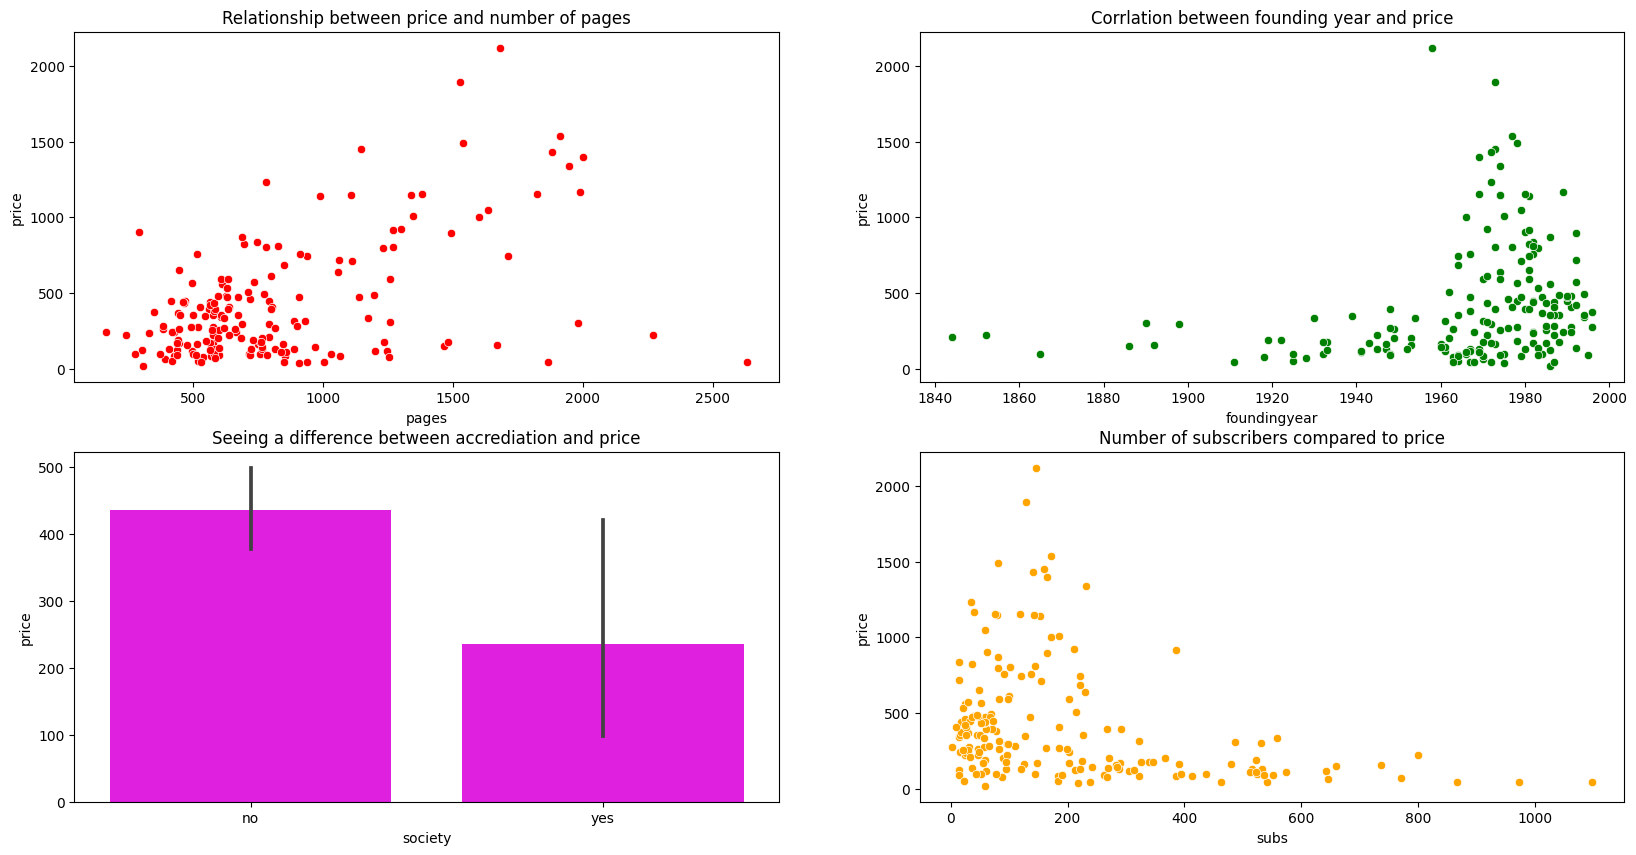

In [6]:
fig,axes = plt.subplots(nrows=2,ncols = 2,figsize=(20,10));

sns.scatterplot(ax = axes[0,0],x='pages',y='price',data = df,color = 'red');
sns.scatterplot(ax = axes[0,1],x='foundingyear',y='price',data = df,color = 'green');
sns.barplot(ax = axes[1,0],x='society',y='price',data = df,color = 'Fuchsia');
sns.scatterplot(ax = axes[1,1],x='subs',y='price',data = df,color='orange');

axes[0,0].title.set_text('Relationship between price and number of pages')
axes[0,1].title.set_text('Corrlation between founding year and price')
axes[1,0].title.set_text('Seeing a difference between accrediation and price')
axes[1,1].title.set_text('Number of subscribers compared to price')

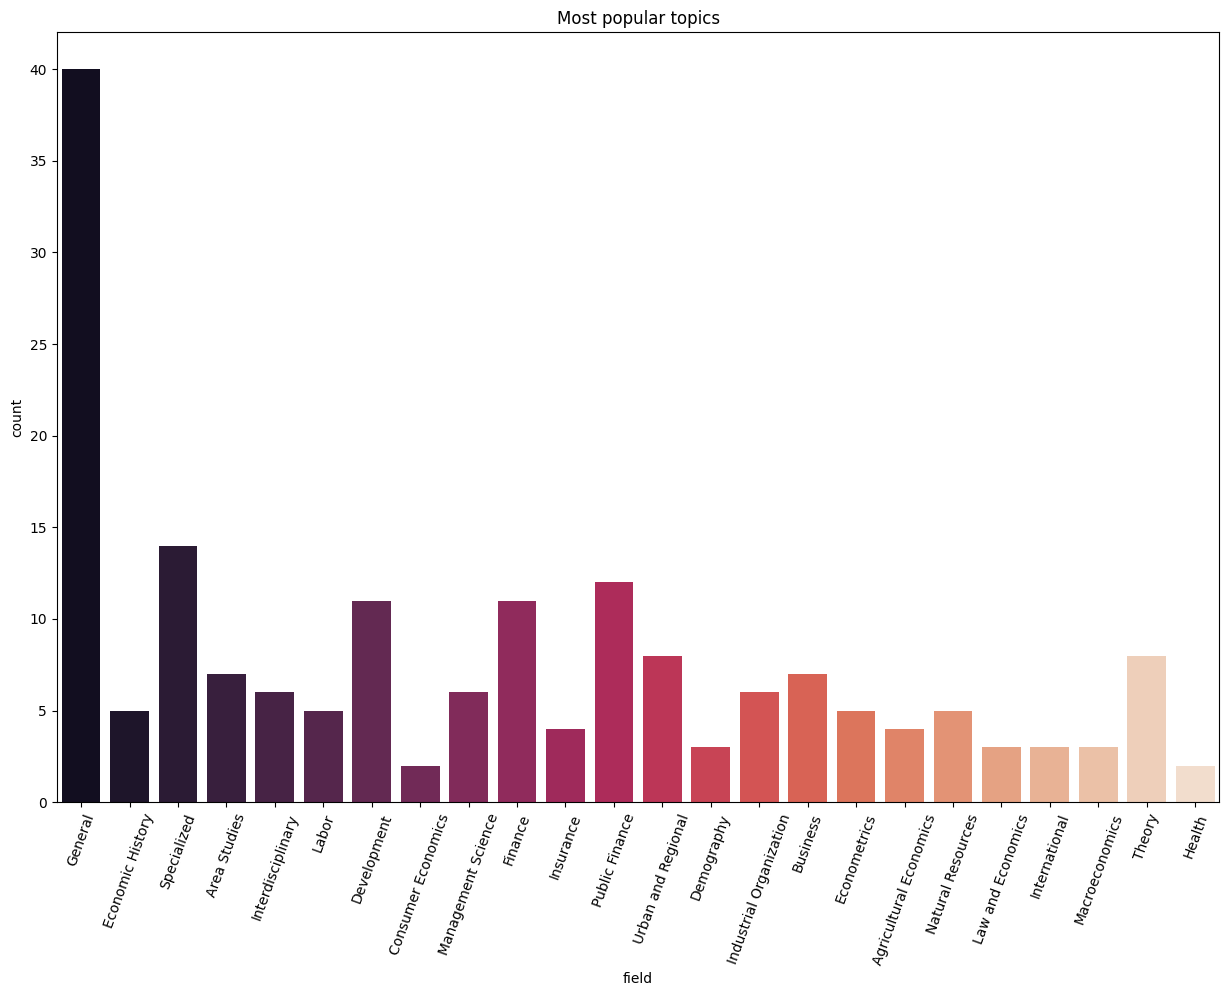

In [7]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=(70))
sns.countplot(x='field',data = df,palette = 'rocket');
plt.title('Most popular topics');

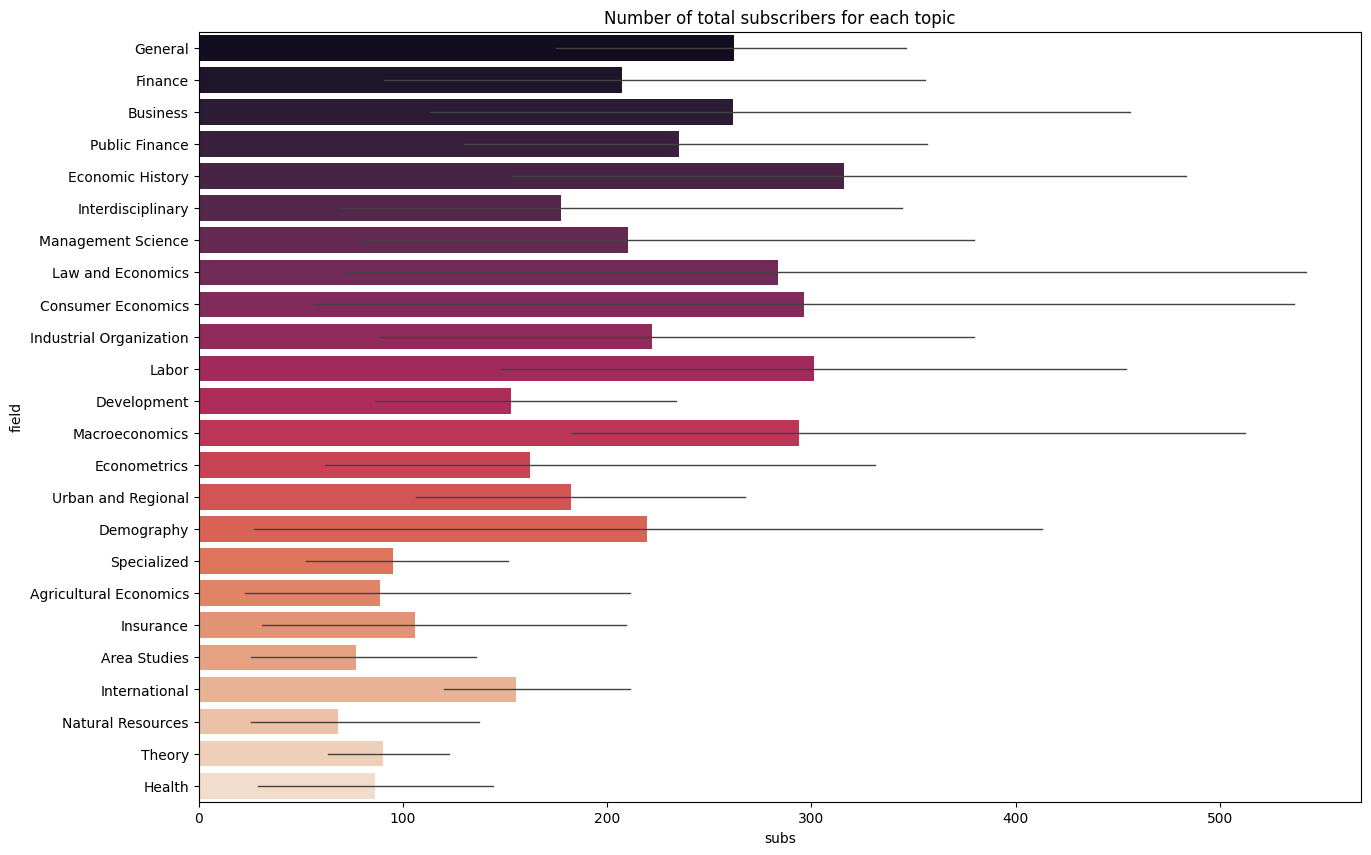

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(data=df.sort_values(by='subs',ascending = False), 
            x='subs', y='field', orient='h',errwidth=1,
            palette = 'rocket');
plt.title('Number of total subscribers for each topic');

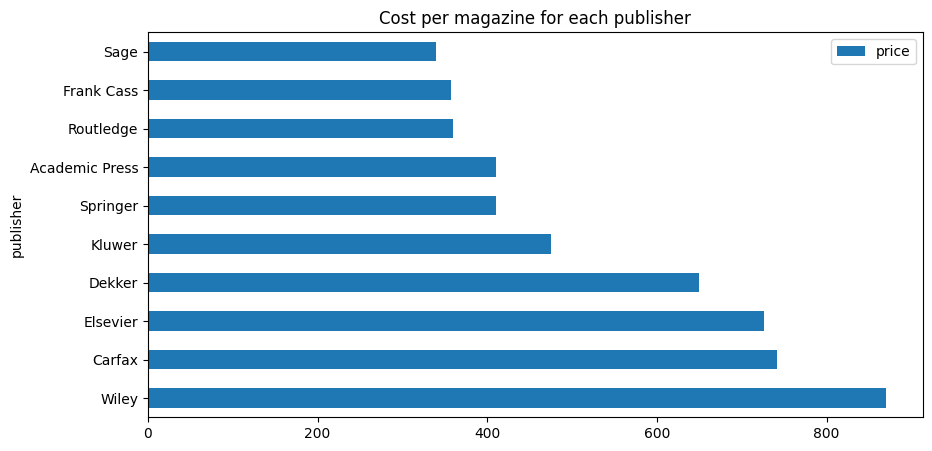

In [9]:
df.groupby('publisher').agg({'price':'median'}).sort_values(by='price',ascending = False).head(10).\
    plot(kind = 'barh',figsize=(10,5),title = 'Cost per magazine for each publisher');

In [10]:
df['society'] = df['society'].replace({'no':0,'yes':1})

In [11]:
df['society'].dtype

dtype('int64')

In [12]:
corr_data = df.loc[:,['price','pages','charpp','citations','subs','society']].corr()

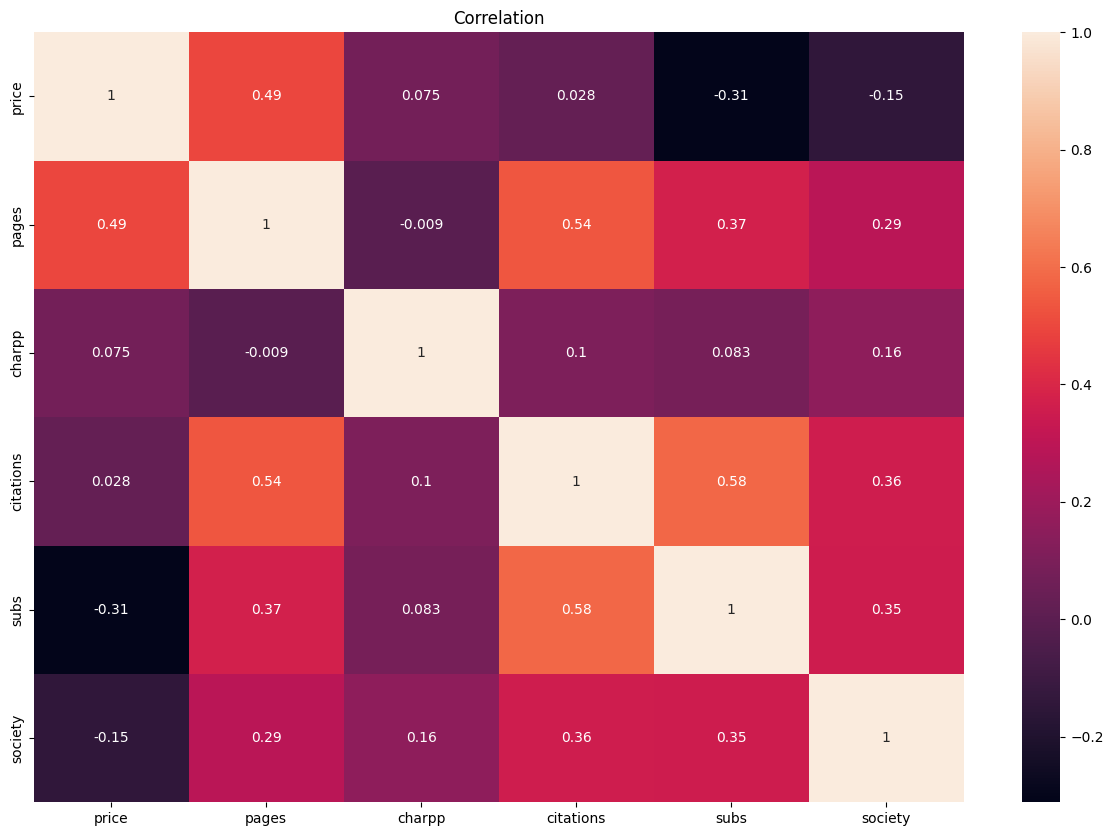

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data = corr_data,annot= True);
plt.title('Correlation');